In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Loading the datasets.
import os
path = os.listdir('C:/Users/KIIT/Brain-tumor/Training/')
classes = {'no_tumor':0,'meningioma_tumor':1}

In [3]:
#creating two python list and going to append all images in X and their respective targets in Y.
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/KIIT/Brain-tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img,(200,200))#all images are of diffr size.so,
        X.append(img)
        Y.append(classes[cls])
        

In [4]:
np.unique(Y)

array([0, 1])

In [5]:
#converting them into numpy array.
X = np.array(X)
Y = np.array(Y)

In [6]:
#counting total number of +ve and -ve tumor. 0 means tumor and 1 means no tumor.
pd.Series(Y).value_counts()

1    822
0    395
dtype: int64

In [7]:
X.shape

(1217, 200, 200)

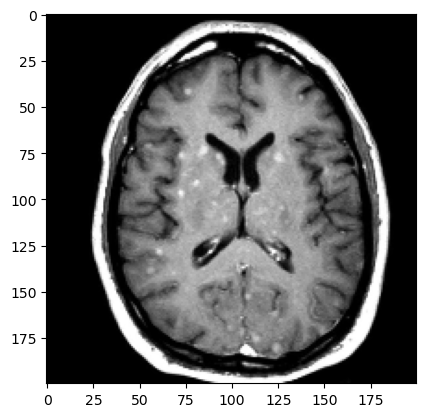

In [8]:
# checking any data in a visual form.
plt.imshow(X[3],cmap = 'gray')

In [9]:
# since,sklearn works on 2-Dimensional data only.so,converting 3-D into 2-D.
X_updated= X.reshape(len(X),-1)
X_updated.shape

(1217, 40000)

In [10]:
#splitting Data where 20% for testing and 80% for training
xtrain,xtest,ytrain,ytest= train_test_split(X_updated,Y,random_state=10,test_size=.20)

In [11]:
xtrain.shape,xtest.shape

((973, 40000), (244, 40000))

In [12]:
#Feature Scaling as features are in diffrnt scale to improve the accuracy.
#The RGB value ranges from 0-255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
# Train Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
import warnings
warnings.filterwarnings('ignore')

log = LogisticRegression(C= 0.1)
log.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

In [15]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [16]:
# Evaluation
print("Training Score :",log.score(xtrain,ytrain))
print("Testing score :",log.score(xtest,ytest))

Training Score : 1.0
Testing score : 0.8237704918032787


In [17]:
# svm is better than logistic
print("Training Score:",sv.score(xtrain,ytrain))
print("Testing Score:",sv.score(xtest,ytest))

Training Score: 0.9650565262076053
Testing Score: 0.8729508196721312


In [18]:
# Prediction
pred = sv.predict(xtest)
np.where(ytest != pred)

(array([ 10,  11,  16,  20,  29,  33,  35,  50,  51,  59,  63,  66,  83,
        102, 106, 108, 115, 118, 120, 124, 129, 132, 136, 154, 161, 174,
        187, 202, 216, 223, 236], dtype=int64),)

In [19]:
pred[51]

1

In [20]:
ytest[51]

0

In [21]:
# Testing the model.
dec = {0:'No Tumor',1:'Positive'}

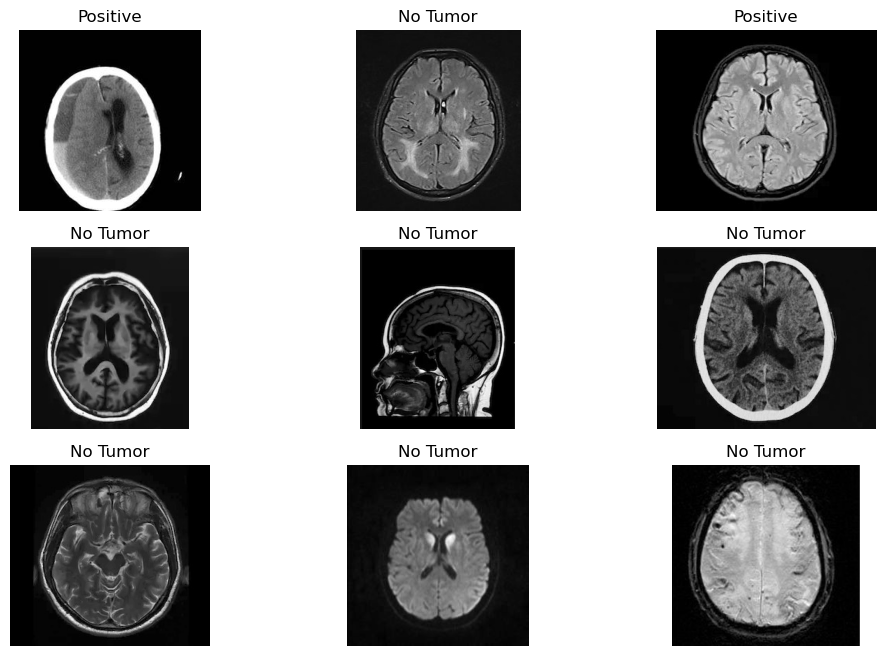

In [22]:
#checking the data by visualizing.
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/KIIT/Brain-tumor/Testing/')
c = 1
for i in os.listdir('C:/Users/KIIT/Brain-tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/KIIT/Brain-tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    c+=1

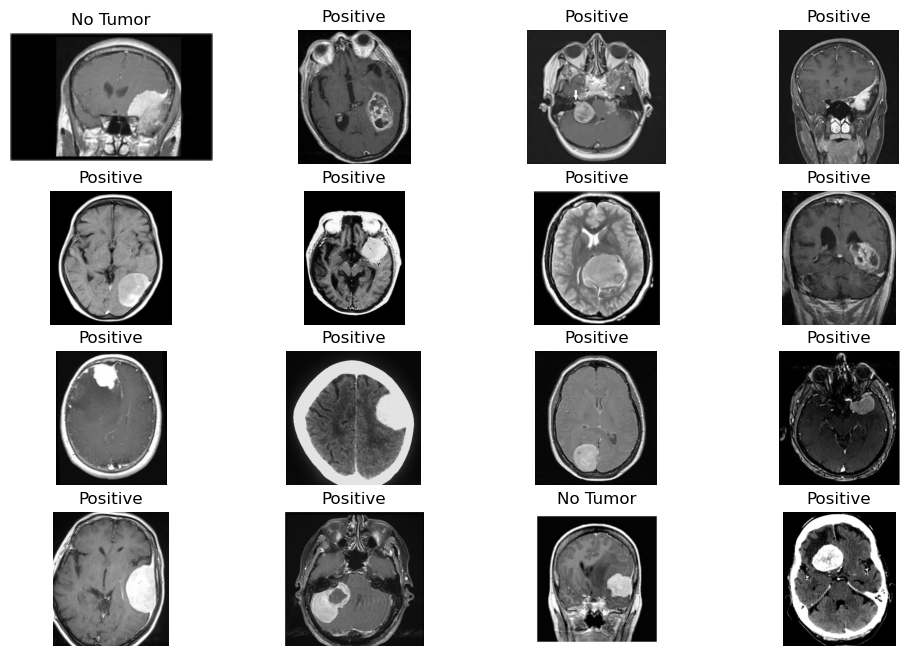

In [23]:
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/KIIT/Brain-tumor/Testing/')
c = 1
for i in os.listdir('C:/Users/KIIT/Brain-tumor/Testing/meningioma_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/KIIT/Brain-tumor/Testing/meningioma_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    c+=1